In [18]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
## Importing the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [20]:
# resizing all images

IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/monkey_species_kaggle/dataset/training'
valid_path = '/content/drive/My Drive/monkey_species_kaggle/dataset/validation'

In [21]:
inception = InceptionV3(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top= False)

In [22]:
# Dont train the existing weights

for layer in inception.layers:
  layer.trainable = False

In [23]:
# getting number of output classes
folders = glob('/content/drive/My Drive/monkey_species_kaggle/dataset/training/*')

In [24]:
len(folders)

10

In [25]:
x = Flatten()(inception.output)

In [26]:
prediction = Dense(len(folders),activation='softmax')(x)

#creating a model object

model = Model(inputs = inception.input, outputs= prediction)

In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [31]:
## Using image data generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/monkey_species_kaggle/dataset/training',
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1098 images belonging to 10 classes.


In [33]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/monkey_species_kaggle/dataset/validation',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 272 images belonging to 10 classes.


In [34]:
## Fitting the model

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=25,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
35/35 [==============================] - 1547s 44s/step - loss: 3.5938 - accuracy: 0.7714 - val_loss: 1.2451 - val_accuracy: 0.9301
Epoch 2/25
35/35 [==============================] - 44s 1s/step - loss: 0.5359 - accuracy: 0.9563 - val_loss: 0.7147 - val_accuracy: 0.9632
Epoch 3/25
35/35 [==============================] - 44s 1s/step - loss: 0.3531 - accuracy: 0.9718 - val_loss: 0.8654 - val_accuracy: 0.9412
Epoch 4/25
35/35 [==============================] - 43s 1s/step - loss: 0.2112 - accuracy: 0.9754 - val_loss: 0.4214 - val_accuracy: 0.9743
Epoch 5/25
35/35 [==============================] - 43s 1s/step - loss: 0.2152 - accuracy: 0.9754 - val_loss: 0.4844 - val_accuracy: 0.9632
Epoch 6/25
35/35 [==============================] - 42s 1s/step - loss: 0.0966 - accuracy: 0.9818 - val_loss: 0.4557 - val_accuracy: 0.9559
Epoch 7/25
35/35 [==============================] - 41s 1s/step - loss: 0.1223 - 

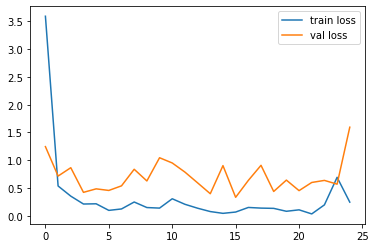

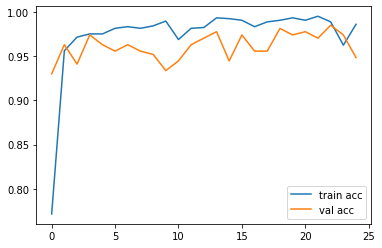

<Figure size 432x288 with 0 Axes>

In [35]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [37]:
y_pred = model.predict(test_set)

In [38]:
y_pred = np.argmax(y_pred, axis=1)

In [39]:
y_pred

array([3, 9, 0, 0, 6, 0, 5, 7, 9, 6, 6, 5, 7, 1, 2, 3, 6, 5, 8, 8, 1, 8,
       7, 5, 8, 2, 2, 8, 5, 7, 9, 3, 4, 8, 9, 3, 1, 5, 9, 4, 5, 6, 8, 7,
       8, 4, 4, 9, 6, 7, 6, 2, 7, 8, 7, 2, 0, 0, 4, 2, 3, 1, 8, 2, 3, 4,
       4, 9, 0, 0, 1, 7, 4, 2, 1, 3, 2, 7, 8, 1, 6, 6, 1, 5, 5, 7, 2, 2,
       2, 0, 2, 2, 9, 3, 0, 3, 6, 5, 4, 6, 2, 3, 3, 8, 9, 1, 5, 5, 5, 9,
       7, 1, 2, 1, 5, 0, 2, 4, 9, 1, 9, 2, 3, 3, 3, 5, 5, 7, 8, 6, 0, 5,
       5, 3, 8, 1, 0, 1, 0, 4, 4, 9, 7, 6, 8, 6, 9, 1, 5, 7, 3, 2, 6, 3,
       5, 2, 7, 0, 0, 4, 8, 8, 7, 9, 8, 8, 8, 1, 8, 0, 3, 2, 7, 9, 3, 1,
       9, 2, 0, 5, 3, 0, 1, 8, 5, 7, 4, 0, 0, 4, 4, 4, 9, 7, 2, 9, 6, 1,
       7, 7, 4, 6, 7, 4, 4, 1, 5, 2, 4, 0, 3, 9, 3, 6, 7, 8, 7, 5, 1, 4,
       0, 5, 3, 0, 0, 7, 1, 0, 2, 9, 6, 4, 9, 4, 5, 3, 2, 1, 7, 1, 1, 0,
       8, 7, 0, 1, 6, 6, 1, 6, 2, 6, 3, 6, 7, 1, 9, 6, 3, 0, 0, 0, 7, 0,
       4, 8, 8, 2, 5, 0, 3, 8])